In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
#problem 1
#读取tsv文件
Sig_Eqs = pd.read_csv('earthquakes-2023-10-31_19-44-06_+0800.tsv', sep='\t')

In [3]:
Sig_Eqs.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,NaN,-2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,NaN,-1610,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,-1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#每个国家死亡人数
deaths_by_country = Sig_Eqs.groupby('Country')['Deaths'].sum()
#降序排列前十个国家
top_ten = deaths_by_country.sort_values(ascending=False).head(10)
print(top_ten)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


In [5]:
#统计每年的地震发生次数
earthquake_by_year = Sig_Eqs[Sig_Eqs['Mag'] > 6].groupby('Year')['Mag'].count()

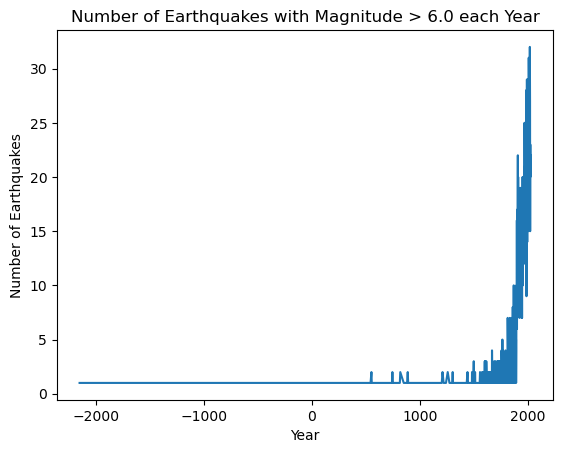

In [6]:
#次数为纵轴年份为横轴绘图
plt.plot(earthquake_by_year.index, earthquake_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes with Magnitude > 6.0 each Year')
plt.show()

In [7]:
#合并Year、Mo和Dy列为一个Date列，区分缺失值
def combine_date(row):
    year = row['Year']
    month = row['Mo']
    day = row['Dy']
    
    if pd.isnull(month):
        datetime = str(year)
    elif pd.isnull(day):
        datetime = str(year) + '/' + str(month)
    else:
        datetime = str(year) + '/' + str(month) + '/' + str(day)
        
    return datetime

Sig_Eqs['Date'] = Sig_Eqs.apply(combine_date, axis=1)
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Date
0,NaN,-2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2150
1,NaN,-2000,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2000
2,NaN,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,-2000
3,NaN,-1610,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,-1610
4,NaN,-1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISRAEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,NaN,2023,2.0,6.0,1.0,17.0,35.0,5873.0,NaN,TURKEY,...,NaN,119200.0,4.0,87500.0,4.0,542461.0,4.0,1474182.0,4.0,2023/2.0/6.0
6393,NaN,2023,2.0,6.0,10.0,24.0,49.0,NaN,NaN,TURKEY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023/2.0/6.0
6394,NaN,2023,2.0,20.0,17.0,4.0,29.0,NaN,NaN,TURKEY,...,NaN,200.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2023/2.0/20.0
6395,NaN,2023,2.0,27.0,9.0,4.0,51.0,NaN,NaN,TURKEY,...,NaN,140.0,3.0,NaN,2.0,31.0,1.0,NaN,NaN,2023/2.0/27.0


In [8]:
def CountEq_LargestEq(country):
#筛选某一国家国家的地震数据
    country_data = Sig_Eqs[Sig_Eqs['Country'] == country]
    total_eqs = len(country_data)
#检查缺失Mag值
    if country_data['Mag'].isnull().all():
        largest_eq_date = 0
    else:
        largest_eq = country_data.loc[~country_data['Mag'].isnull(), 'Mag'].idxmax()
        largest_eq_date = country_data.loc[largest_eq, 'Date']
    
    return total_eqs, largest_eq_date
CountEq_LargestEq('CHINA')

(620, '1668/7.0/25.0')

In [9]:
country_eqs = []
#每个国家的地震总数和最大地震发生日期
for country in Sig_Eqs['Country'].unique():  
    total_eqs, largest_eq_date = CountEq_LargestEq(country)
    print(country, total_eqs, largest_eq_date)
    country_eqs.append((country, total_eqs, largest_eq_date))

JORDAN 5 -2150
SYRIA 33 1202/5.0/20.0
TURKMENISTAN 11 1895/7.0/8.0
GREECE 271 365/7.0/21.0
ISRAEL 24 -31/9.0/2.0
ITALY 331 1915/1.0/13.0
LEBANON 14 551/7.0/9.0
IRAN 384 856/12.0/22.0
INDIA 100 1950/8.0/15.0
TURKEY 335 1939/12.0/26.0
KYRGYZSTAN 14 1946/11.0/2.0
SPAIN 34 881/5.0/26.0
EGYPT 15 1995/11.0/22.0
PORTUGAL 28 -60
CHINA 620 1668/7.0/25.0
RUSSIA 152 1952/11.0/4.0
ALBANIA 56 1893/6.0/14.0
BULGARIA 18 1904/4.0/4.0
GEORGIA 15 1905/10.0/21.0
CYPRUS 7 1953/9.0/10.0
PAKISTAN 53 1945/11.0/27.0
SOUTH KOREA 21 1643/7.0/25.0
AFGHANISTAN 66 1909/7.0/7.0
UKRAINE 12 103
MACEDONIA 12 1979/5.0/24.0
TUNISIA 9 1957/2.0/20.0
AZERBAIJAN 16 1667/11.0
THAILAND 4 2014/5.0/5.0
FRANCE 43 1817/3.0/11.0
KAZAKHSTAN 10 1889/7.0/11.0
NORTH KOREA 6 1518/7.0/2.0
SLOVENIA 22 1511/3.0/26.0
IRAQ 24 1864/12.0/2.0
JAPAN 414 2011/3.0/11.0
UK 14 1580/4.0/6.0
ARMENIA 13 1988/12.0/7.0
UZBEKISTAN 14 1976/4.0/8.0
ICELAND 17 1912/5.0/6.0
SWITZERLAND 31 1601/9.0/18.0
YEMEN 10 1982/12.0/13.0
NEPAL 19 1505/6.0/6.0
MOROCCO 21

In [10]:
#按照地震发生次数降序排列
country_eqs_sorted = sorted(country_eqs, key=lambda x: x[1], reverse=True)
print(country_eqs_sorted)

[('CHINA', 620, '1668/7.0/25.0'), ('JAPAN', 414, '2011/3.0/11.0'), ('INDONESIA', 411, '2004/12.0/26.0'), ('IRAN', 384, '856/12.0/22.0'), ('TURKEY', 335, '1939/12.0/26.0'), ('ITALY', 331, '1915/1.0/13.0'), ('USA', 276, '1964/3.0/28.0'), ('GREECE', 271, '365/7.0/21.0'), ('PHILIPPINES', 224, '1897/9.0/21.0'), ('MEXICO', 208, '1899/1.0/24.0'), ('CHILE', 198, '1960/5.0/22.0'), ('PERU', 190, '1716/2.0/6.0'), ('RUSSIA', 152, '1952/11.0/4.0'), ('PAPUA NEW GUINEA', 101, '1919/5.0/6.0'), ('INDIA', 100, '1950/8.0/15.0'), ('TAIWAN', 100, '1920/6.0/5.0'), ('COLOMBIA', 80, '1826/6.0/18.0'), ('NEW ZEALAND', 71, '1826'), ('ECUADOR', 68, '1906/1.0/31.0'), ('AFGHANISTAN', 66, '1909/7.0/7.0'), ('VENEZUELA', 66, '1894/4.0/29.0'), ('SOLOMON ISLANDS', 62, '1977/4.0/21.0'), ('ALGERIA', 57, '1980/10.0/10.0'), ('ALBANIA', 56, '1893/6.0/14.0'), ('VANUATU', 54, '1913/10.0/14.0'), ('PAKISTAN', 53, '1945/11.0/27.0'), ('CROATIA', 53, '1667/4.0/6.0'), ('FRANCE', 43, '1817/3.0/11.0'), ('USA TERRITORY', 40, '1902/9.0/

In [11]:
#problem 2
wind = pd.read_csv("2281305.csv")
wind

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13960\3899795488.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind = pd.read_csv("2281305.csv")


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"
111981,59493099999,2020-09-11T19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1"
111982,59493099999,2020-09-11T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1"


In [12]:
wind['DATE'] = pd.to_datetime(wind['DATE'])

In [13]:
#筛出WND异常值
mask = wind['WND'].str.split(',', expand=True)[3] == '9999'
avail_wind = wind[~mask]
avail_wind

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02 00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02 01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02 03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02 04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11 17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11 18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"
111981,59493099999,2020-09-11 19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1"
111982,59493099999,2020-09-11 20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1"


In [14]:
#提取风速
avail_wind['wind_speed'] = avail_wind['WND'].str.split(',').str[3].astype(float)
avail_wind

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13960\2942957512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avail_wind['wind_speed'] = avail_wind['WND'].str.split(',').str[3].astype(float)


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND,wind_speed
0,59493099999,2010-01-02 00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1",20.0
1,59493099999,2010-01-02 01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1",10.0
2,59493099999,2010-01-02 02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1",0.0
3,59493099999,2010-01-02 03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1",10.0
4,59493099999,2010-01-02 04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1",40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11 17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1",30.0
111980,59493099999,2020-09-11 18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1",40.0
111981,59493099999,2020-09-11 19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1",30.0
111982,59493099999,2020-09-11 20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1",30.0


In [15]:
#提取DATE和对应风速
average_wind_by_date = avail_wind.groupby('DATE')['wind_speed'].mean().reset_index()
average_wind_by_date

,DATE,wind_speed
0,2010-01-02 00:00:00,20.0
1,2010-01-02 01:00:00,10.0
2,2010-01-02 02:00:00,0.0
3,2010-01-02 03:00:00,10.0
4,2010-01-02 04:00:00,40.0
...,...,...
92665,2020-09-11 17:00:00,30.0
92666,2020-09-11 18:00:00,40.0
92667,2020-09-11 19:00:00,30.0
92668,2020-09-11 20:00:00,30.0


In [40]:
#统计每个月平均风速值
average_wind_by_date['DATE'] = pd.to_datetime(average_wind_by_date['DATE'])
average_wind_by_month = average_wind_by_date.resample('M', on='DATE').mean()/10
average_wind_by_month['wind_speed'] = average_wind_by_month['wind_speed']
average_wind_by_month.index = average_wind_by_month.index.strftime('%Y-%m')
average_wind_by_month

,wind_speed
DATE,
2010-01,2.756267
2010-02,3.388060
2010-03,3.360700
2010-04,3.191341
2010-05,3.293640
...,...
2020-05,4.361694
2020-06,5.576602
2020-07,5.463342


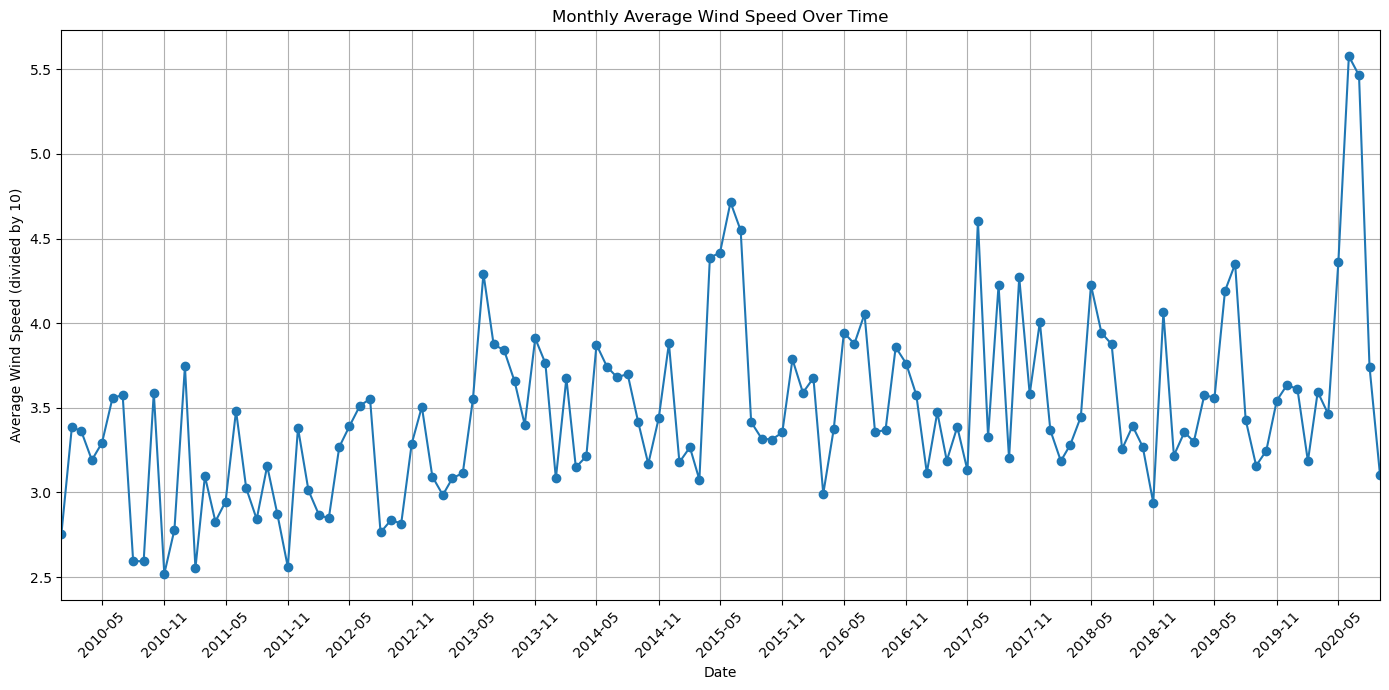

In [41]:
average_wind_by_month.index = pd.to_datetime(average_wind_by_month.index)
plt.figure(figsize=(14,7))

#绘制时间序列图
plt.plot(average_wind_by_month.index, average_wind_by_month['wind_speed'], marker='o', linestyle='-')

#设置标题和标签
plt.title('Monthly Average Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average Wind Speed (divided by 10)')

#设置x轴的间隔和格式
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#设置x轴范围
plt.xlim([pd.to_datetime('2010-01'), pd.to_datetime('2020-09')])
#旋转x轴标签
plt.xticks(rotation=45)  

plt.tight_layout()
plt.grid(True)
plt.show()

In [32]:
#problem 3
tempo = pd.read_csv("data.csv")
tempo

,Date,ClimDiv,USCRN
0,1896,-1.62,-99.99
1,1897,-1.81,-99.99
2,1898,-1.16,-99.99
3,1899,-3.27,-99.99
4,1900,-0.66,-99.99
...,...,...,...
123,2019,-0.63,-0.52
124,2020,0.53,0.58
125,2021,0.81,0.84
126,2022,1.11,1.18


In [51]:
#去除异常值
mask = tempo['USCRN'] == -99.99
avail_tempo = tempo[~mask]
avail_tempo

,Date,ClimDiv,USCRN
110,2006,0.96,0.80
111,2007,0.32,0.25
112,2008,-0.64,-0.78
113,2009,-0.57,-0.67
114,2010,-0.71,-0.82
115,2011,-0.37,-0.44
116,2012,2.04,2.03
117,2013,-0.21,-0.25
118,2014,-1.31,-1.26
119,2015,0.50,0.56


In [52]:
#将华氏度转换为摄氏度
def f_to_c(temp_f):
    temp_c = (temp_f - 32) * 5/9
    return temp_c

avail_tempo['temp_c_c'] = avail_tempo['ClimDiv'].apply(f_to_c)
avail_tempo['temp_c_u'] = avail_tempo['USCRN'].apply(f_to_c)
avail_tempo['temp_mean'] = (avail_tempo['temp_c_c'] + avail_tempo['temp_c_u'])/2
avail_tempo

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13960\3338657354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avail_tempo['temp_c_c'] = avail_tempo['ClimDiv'].apply(f_to_c)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13960\3338657354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avail_tempo['temp_c_u'] = avail_tempo['USCRN'].apply(f_to_c)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_13960\3338657354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,Date,ClimDiv,USCRN,temp_c_c,temp_c_u,temp_mean
110,2006,0.96,0.80,-17.244444,-17.333333,-17.288889
111,2007,0.32,0.25,-17.600000,-17.638889,-17.619444
112,2008,-0.64,-0.78,-18.133333,-18.211111,-18.172222
113,2009,-0.57,-0.67,-18.094444,-18.150000,-18.122222
114,2010,-0.71,-0.82,-18.172222,-18.233333,-18.202778
115,2011,-0.37,-0.44,-17.983333,-18.022222,-18.002778
116,2012,2.04,2.03,-16.644444,-16.650000,-16.647222
117,2013,-0.21,-0.25,-17.894444,-17.916667,-17.905556
118,2014,-1.31,-1.26,-18.505556,-18.477778,-18.491667
119,2015,0.50,0.56,-17.500000,-17.466667,-17.483333


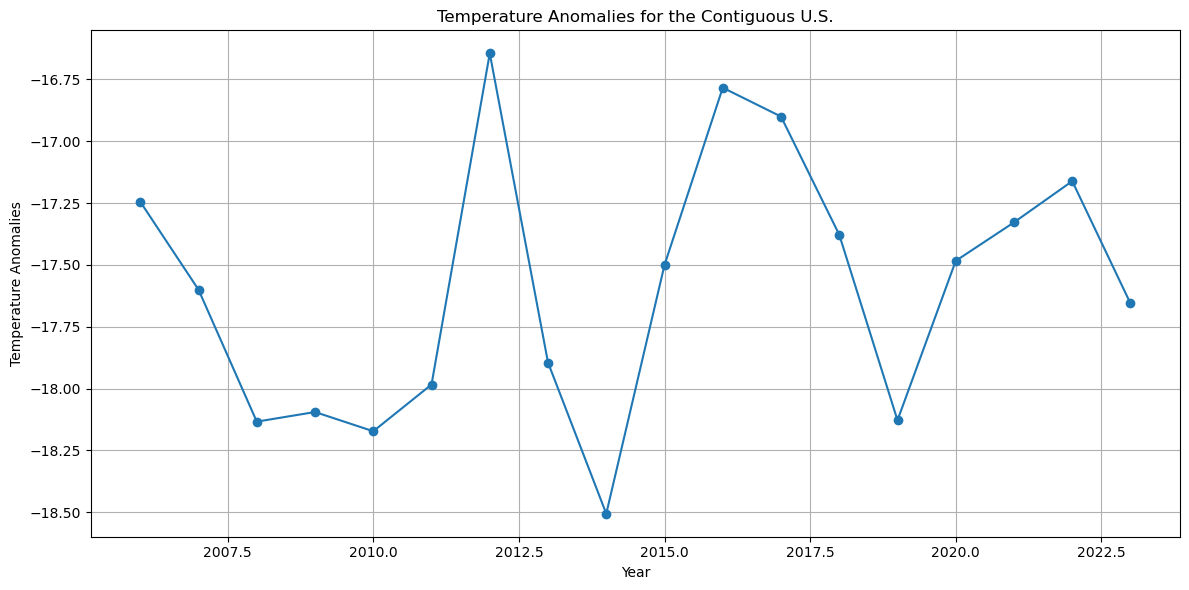

In [39]:
#使用ClimDiv数据绘制异常温度图
plt.figure(figsize=(12, 6))
plt.plot(avail_tempo['Date'], avail_tempo['temp_c_c'], marker='o', linestyle='-')
plt.title('Temperature Anomalies for the Contiguous U.S.')
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
#计算统计量：均值 中位数 标准差 最低值 最高值 1/4处 3/4处
mean_avail_tempo = avail_tempo['temp_mean'].mean()
median_avail_tempo = avail_tempo['temp_mean'].median()
std_avail_tempo = avail_tempo['temp_mean'].std()
min_avail_tempo = avail_tempo['temp_mean'].min()
max_avail_tempo = avail_tempo['temp_mean'].max()

q1_avail_tempo = avail_tempo['temp_mean'].quantile(0.25)
q3_avail_tempo = avail_tempo['temp_mean'].quantile(0.75)

print(f"Mean temperature: {mean_avail_tempo}")
print(f"Median temperature: {median_avail_tempo}")
print(f"Standard Deviation of temperature: {std_avail_tempo}")
print(f"Minimum temperature: {min_avail_tempo}")
print(f"Maximum temperature: {max_avail_tempo}")
print(f"First Quartile (25th percentile) of temperature: {q1_avail_tempo}")
print(f"Third Quartile (75th percentile) of temperature: {q3_avail_tempo}")

Mean temperature: -17.589197530864197
Median temperature: -17.55138888888889
Standard Deviation of temperature: 0.5346897654939489
Minimum temperature: -18.491666666666667
Maximum temperature: -16.647222222222222
First Quartile (25th percentile) of temperature: -18.073611111111113
Third Quartile (75th percentile) of temperature: -17.296527777777776


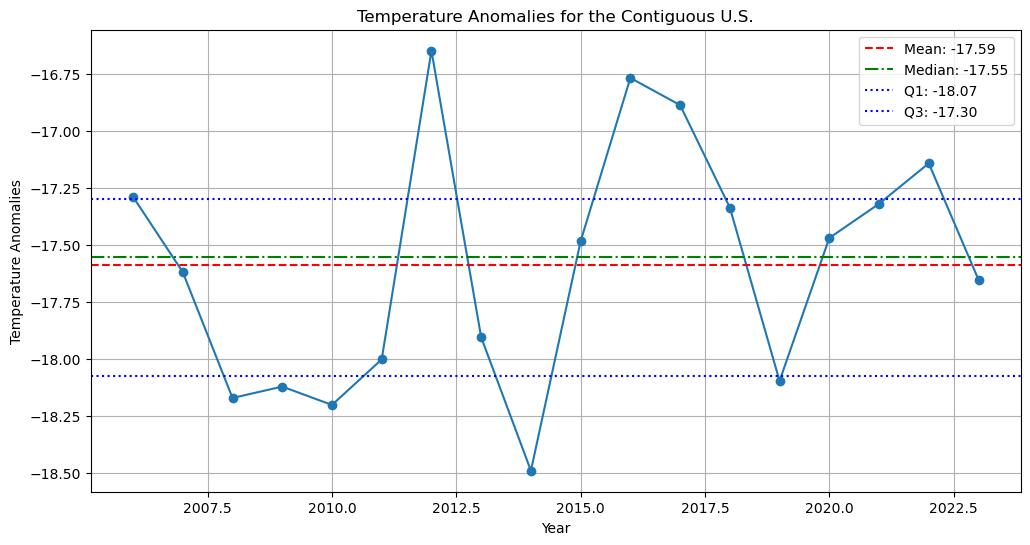

In [61]:
mean_avail_tempo = avail_tempo['temp_mean'].mean()
median_avail_tempo = avail_tempo['temp_mean'].median()
std_avail_tempo = avail_tempo['temp_mean'].std()
min_avail_tempo = avail_tempo['temp_mean'].min()
max_avail_tempo = avail_tempo['temp_mean'].max()

q1_avail_tempo = avail_tempo['temp_mean'].quantile(0.25)
q3_avail_tempo = avail_tempo['temp_mean'].quantile(0.75)

plt.figure(figsize=(12,6))
#绘制时间序列图
plt.plot(avail_tempo['Date'], avail_tempo['temp_mean'], marker='o', linestyle='-')
#绘制均值线
plt.axhline(mean_avail_tempo, color='red', linestyle='--', label=f'Mean: {mean_avail_tempo:.2f}')
#绘制中位数线
plt.axhline(median_avail_tempo, color='green', linestyle='-.', label=f'Median: {median_avail_tempo:.2f}')
#绘制第一和第三四分位数线
plt.axhline(q1_avail_tempo, color='blue', linestyle=':', label=f'Q1: {q1_avail_tempo:.2f}')
plt.axhline(q3_avail_tempo, color='blue', linestyle=':', label=f'Q3: {q3_avail_tempo:.2f}')

plt.title('Temperature Anomalies for the Contiguous U.S.')
plt.xlabel('Year')
plt.ylabel('Temperature Anomalies')
plt.legend()
plt.grid(True)
plt.show()